# Sentiment Analysis: Analyzing customer reviews and support interactions to identify pain points.
## OBJECTIVES
* Create a "Text to Vader" Pipeline
* Create a "Text to Stopwords Remover to Vader" Pipeline
* Create a "Text to Stopwords Remover to Bag of Words to Custom Model"
* Create a "Text to Stopwords Remover to TF-IDF to Custom Model"
* Identify customer pain points from negative sentiment reviews

## WORKFLOW
1. DATA COLLECTION AND LOADING
2. TEXT PROCESSING
3. MODEL CREATION
4. MODEL EVALUATION AND SELECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')
stopwords = stopwords.words('english')
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df = pd.read_csv('order_reviews_cleaned.csv')

In [3]:
# peak at data
df.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01


In [4]:
# Convert date columns to datetime
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])

In [5]:
# data infor
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40977 entries, 0 to 40976
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                40977 non-null  object        
 1   order_id                 40977 non-null  object        
 2   review_score             40977 non-null  int64         
 3   review_comment_message   40977 non-null  object        
 4   review_creation_date     40977 non-null  datetime64[ns]
 5   review_answer_timestamp  40977 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 1.9+ MB


In [6]:
# check review score
df['review_score'].unique()

array([5, 4, 2, 1, 3])

## Mapping the review_ score

In [7]:
# Map review scores to sentiment labels
def map_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['review_score'].apply(map_sentiment)

# Verify mapping
df['sentiment'].value_counts()


sentiment
Positive    26530
Negative    10890
Neutral      3557
Name: count, dtype: int64

In [8]:
# view data
df.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,sentiment
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,Positive
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,Positive
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,Positive
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16,2018-02-20 10:52:22,Positive
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01,Positive


# Exploratory Data Analysis

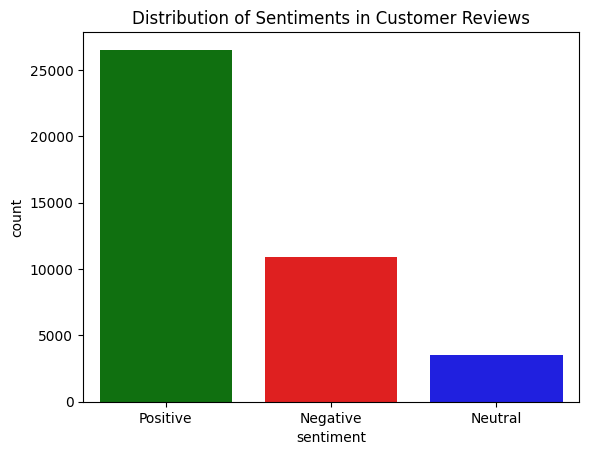

In [9]:
# plot sentiment distribution
sns.countplot(x='sentiment', data=df, palette={'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'})
plt.title("Distribution of Sentiments in Customer Reviews")
plt.show()


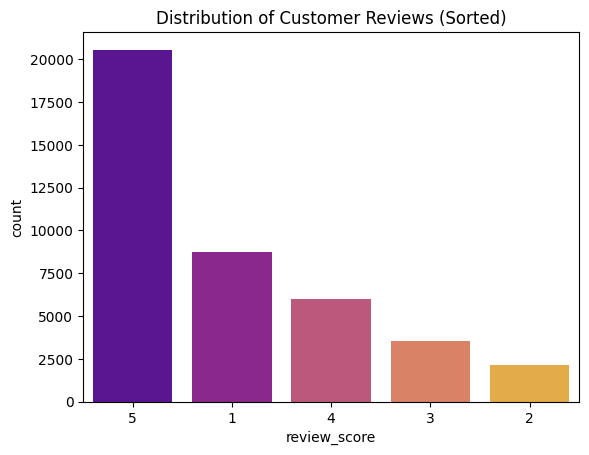

In [10]:
# review score distribution 
# Plot countplot with sorted order
sns.countplot(x='review_score', data=df, palette='plasma', 
              order=df['review_score'].value_counts().index)

plt.title("Distribution of Customer Reviews (Sorted)")
plt.show()

In [11]:
# Set review_creation_date as the index
df.set_index('review_creation_date', inplace=True)

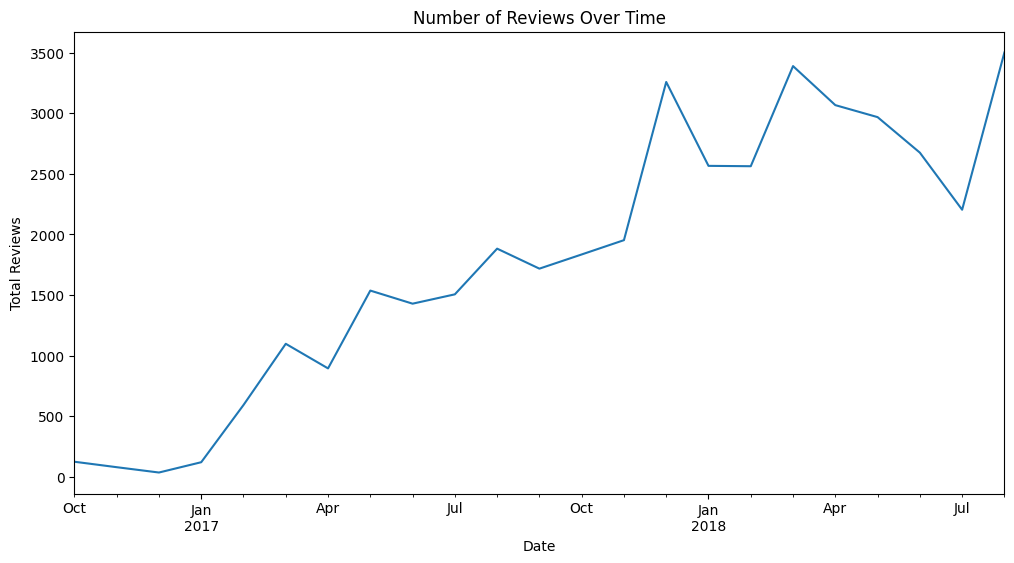

In [12]:
# Resample by month and plot the trend
df.resample('M').size().plot(kind='line', figsize=(12, 6))

plt.title("Number of Reviews Over Time")
plt.ylabel("Total Reviews")
plt.xlabel("Date")
plt.show()

# Bivariate Analys

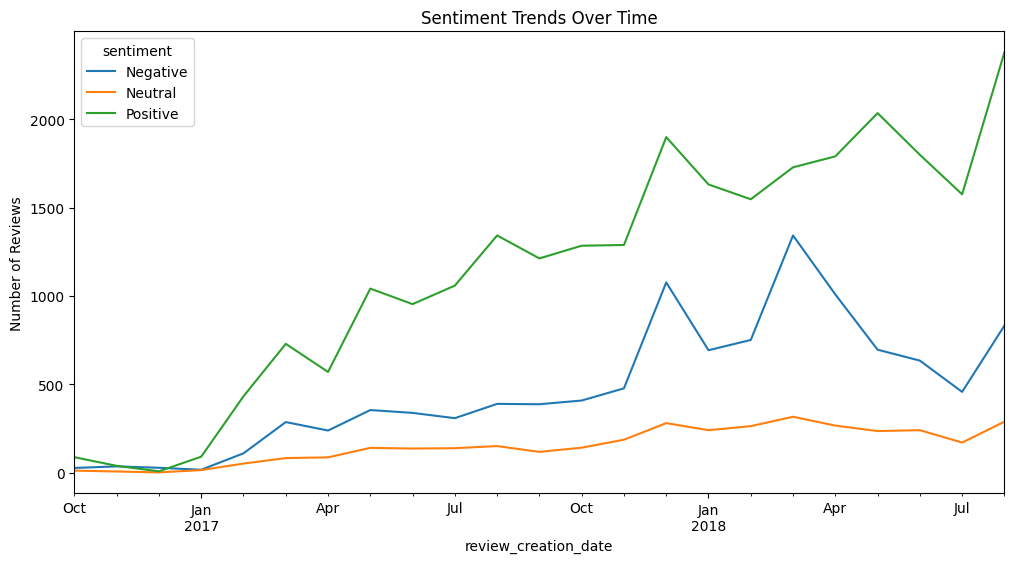

In [13]:
# plot time series 
df.resample('M')['sentiment'].value_counts().unstack().plot(kind='line', figsize=(12, 6))
plt.title("Sentiment Trends Over Time")
plt.ylabel("Number of Reviews")
plt.show()

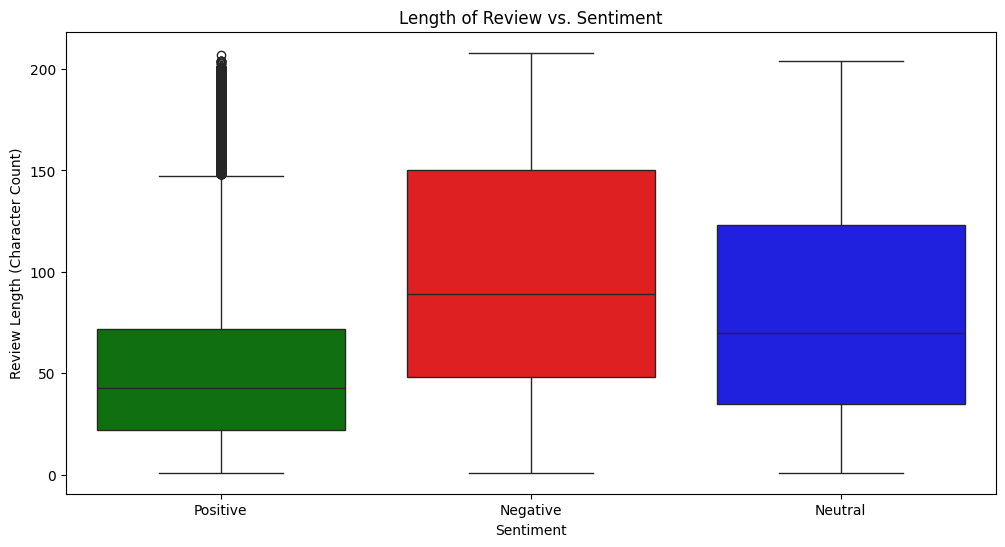

In [14]:
# Create a new column for review length
df['review_length'] = df['review_comment_message'].astype(str).apply(len)

# Plot review length distribution by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='review_length', data=df, palette={'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'})

plt.title("Length of Review vs. Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (Character Count)")
plt.show()

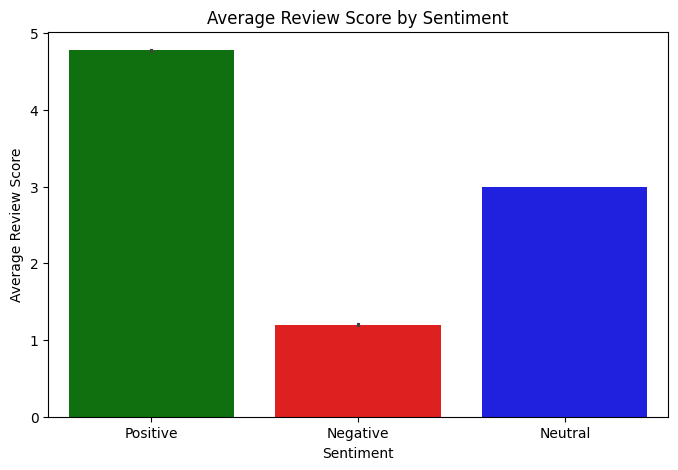

In [15]:
# Plot review score distribution by sentiment
plt.figure(figsize=(8, 5))
sns.barplot(x='sentiment', y='review_score', data=df, estimator=np.mean, palette={'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'})

plt.title("Average Review Score by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Review Score")
plt.show()


# multivariate analysis 

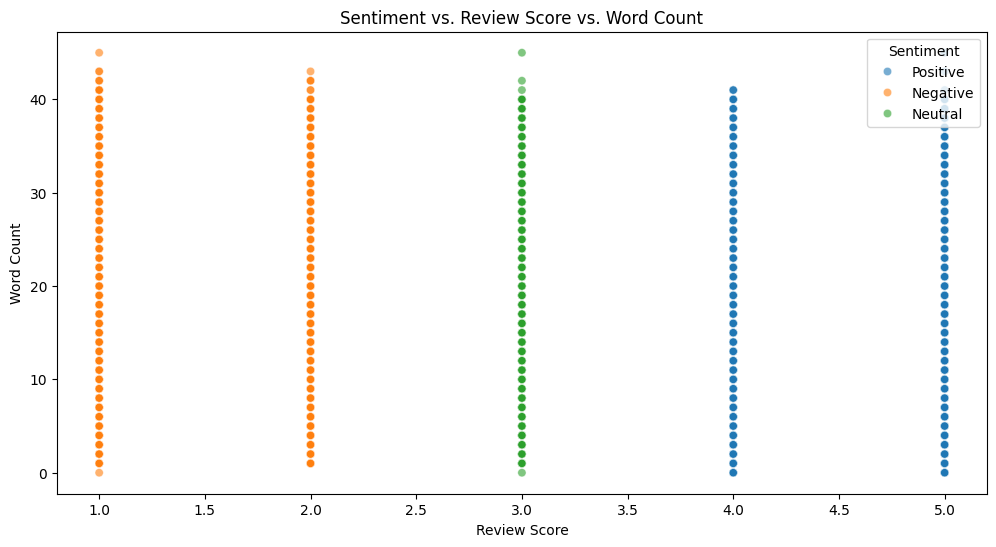

In [16]:
# Create a column for word count in reviews
df['word_count'] = df['review_comment_message'].astype(str).apply(lambda x: len(x.split()))

# Scatter plot for review score vs. word count, colored by sentiment
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_score', y='word_count', hue='sentiment', data=df, alpha=0.6)

plt.title("Sentiment vs. Review Score vs. Word Count")
plt.xlabel("Review Score")
plt.ylabel("Word Count")
plt.legend(title="Sentiment")
plt.show()



# Observations from EDA
#### 1. Sentiment Distribution
* Most reviews are Positive, followed by Negative and Neutral reviews.
* There is a clear imbalance, with a high number of 5-star reviews but also a significant amount of 1-star reviews, indicating polarized opinions.

#### 2. Review Score Distribution by Sentiment
* Positive sentiment has the highest average review score (~4.8), confirming alignment between sentiment and scores.
* Negative sentiment has an average review score close to 1.5, showing that low ratings strongly correlate with negative sentiment.
* Neutral sentiment clusters around a score of ~3, as expected.

#### 3. Length of Review vs. Sentiment
* Negative reviews tend to be longer, suggesting detailed complaints and dissatisfaction.
* Positive reviews are generally shorter, often brief expressions of satisfaction.
* Neutral reviews have mixed review lengths, possibly indicating moderate experiences or a lack of strong opinion.

#### 4. Sentiment Trends Over Time
* Positive sentiment dominates across all time periods, but negative sentiment follows a noticeable increasing trend.
* Peaks in negative sentiment could indicate issues with product quality, service, or delivery delays in certain months.

#### 5. Total Reviews Over Time
* There is a clear increase in reviews over time, suggesting growing customer engagement.
* Fluctuations in review volume may correlate with seasonal trends or marketing campaigns.

#### Business Takeaways
* Customer satisfaction is generally high, but negative reviews indicate pain points that need addressing.
* Longer negative reviews suggest specific recurring issues—further NLP analysis can extract key complaint themes.
* Seasonal spikes in negative sentiment should be investigated, possibly linked to service delays or product demand fluctuations.

# Text Processing
* Remove stop words
* bag of words
* TFIDF

In [17]:
df.head()

,review_id,order_id,review_score,review_comment_message,review_answer_timestamp,sentiment,review_length,word_count
review_creation_date,,,,,,,,
2017-04-21,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 22:02:06,Positive,37,6
2018-03-01,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53,Positive,100,15
2018-05-22,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-23 16:45:47,Positive,174,30
2018-02-16,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-20 10:52:22,Positive,45,7
2018-05-23,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-24 03:00:01,Positive,56,9


In [18]:
# Keep only necessary columns
df = df[['review_comment_message', 'sentiment']]


In [19]:
# Reset index to maintain order
df.reset_index(drop=True, inplace=True)
# Check the first few rows
df.head()


,review_comment_message,sentiment
0,Recebi bem antes do prazo estipulado.,Positive
1,Parabéns lojas lannister adorei comprar pela I...,Positive
2,aparelho eficiente. no site a marca do aparelh...,Positive
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",Positive
4,"Vendedor confiável, produto ok e entrega antes...",Positive


## Translate reviews to English from portuguese

In [20]:
df.head()  # Check if 'translated_review' exists and has data
 # Check if the 'translated_review' column is fully populated


,review_comment_message,sentiment
0,Recebi bem antes do prazo estipulado.,Positive
1,Parabéns lojas lannister adorei comprar pela I...,Positive
2,aparelho eficiente. no site a marca do aparelh...,Positive
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",Positive
4,"Vendedor confiável, produto ok e entrega antes...",Positive


In [21]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load the alternative translation model
model_name = "unicamp-dl/translation-pt-en-t5"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)



You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [22]:
import torch

# Function to translate text using the offline model
def translate_offline(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    translated_tokens = model.generate(**inputs)
    return tokenizer.decode(translated_tokens[0], skip_special_tokens=True)


In [23]:
## Batch apply translations

In [24]:
batch_size = 500  # Process 500 reviews at a time
translated_reviews = []

for i in range(0, len(df), batch_size):
    batch = df['review_comment_message'].iloc[i:i + batch_size].tolist()
    translated_batch = [translate_offline(text) for text in batch]
    translated_reviews.extend(translated_batch)
    print(f" Translated {i + batch_size} reviews...")  # Show progress

# Assign translated reviews to DataFrame
df['translated_review'] = translated_reviews


 Translated 500 reviews...
 Translated 1000 reviews...
 Translated 1500 reviews...
 Translated 2000 reviews...
 Translated 2500 reviews...
 Translated 3000 reviews...
 Translated 3500 reviews...
 Translated 4000 reviews...
 Translated 4500 reviews...
 Translated 5000 reviews...
 Translated 5500 reviews...
 Translated 6000 reviews...
 Translated 6500 reviews...
 Translated 7000 reviews...
 Translated 7500 reviews...
 Translated 8000 reviews...
 Translated 8500 reviews...
 Translated 9000 reviews...
 Translated 9500 reviews...
 Translated 10000 reviews...
 Translated 10500 reviews...
 Translated 11000 reviews...
 Translated 11500 reviews...
 Translated 12000 reviews...
 Translated 12500 reviews...
 Translated 13000 reviews...
 Translated 13500 reviews...
 Translated 14000 reviews...
 Translated 14500 reviews...
 Translated 15000 reviews...
 Translated 15500 reviews...
 Translated 16000 reviews...
 Translated 16500 reviews...
 Translated 17000 reviews...
 Translated 17500 reviews...
 Tran

In [25]:
# save translated dataset to csv
df.to_csv("translated_reviews.csv", index=False, encoding="utf-8")


In [26]:
# import translated data
df1 = pd.read_csv("translated_reviews.csv")  # Reloads translated data into df1


In [27]:
# view first 5 rows
df1.head()

,review_comment_message,sentiment,translated_review
0,Recebi bem antes do prazo estipulado.,Positive,Received well before the stipulated deadline.
1,Parabéns lojas lannister adorei comprar pela I...,Positive,Congratulations stores lannister I loved to bu...
2,aparelho eficiente. no site a marca do aparelh...,Positive,On the website the device brand is printed as ...
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",Positive,"But a little , locking...by the ta value Good."
4,"Vendedor confiável, produto ok e entrega antes...",Positive,"Reliable salesperson, product ok and delivery ..."


In [28]:
# data infor
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40977 entries, 0 to 40976
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  40977 non-null  object
 1   sentiment               40977 non-null  object
 2   translated_review       40950 non-null  object
dtypes: object(3)
memory usage: 960.5+ KB


In [33]:
# Check missing values in df1
print(df1['translated_review'].isna().sum()) 

27


In [34]:
# Re-run translation only for missing rows in df1
missing_mask = df1['translated_review'].isna()
df1.loc[missing_mask, 'translated_review'] = df1.loc[missing_mask, 'review_comment_message'].apply(translate_offline)

# Verify all translations are complete
print(df1['translated_review'].isna().sum()) 


0


In [40]:
# check if there are missing values after translating the 27
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40977 entries, 0 to 40976
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  40977 non-null  object
 1   sentiment               40977 non-null  object
 2   translated_review       40977 non-null  object
dtypes: object(3)
memory usage: 960.5+ KB


In [43]:
df1.tail()

,review_comment_message,sentiment,translated_review
40972,para este produto recebi de acordo com a compr...,Positive,I received this product according to the purch...
40973,Entregou dentro do prazo. O produto chegou em ...,Positive,It delivered within the deadline. The product ...
40974,"O produto não foi enviado com NF, não existe v...",Neutral,"The product was not sent with NF, there is no ..."
40975,"Excelente mochila, entrega super rápida. Super...",Positive,"Great backpack, very fast delivery.I am recomm..."
40976,"meu produto chegou e ja tenho que devolver, po...",Negative,"I have to return it, because it is defective , no"


#### Text Processing after reviews are translated

Remove stop words

bag of words

TFIDF


In [64]:
text = "The product arrived late and the quality is not as expected. Very disappointed."

# Tokenize the split: split into list of words
words=nltk.word_tokenize(text)

words

['The',
 'product',
 'arrived',
 'late',
 'and',
 'the',
 'quality',
 'is',
 'not',
 'as',
 'expected',
 '.',
 'Very',
 'disappointed',
 '.']

In [ ]:
# Define stop words, but keep negation words
#negation_words = {"no", "not", "nor", "never", "none", "isn't", "wasn't", "won't", "don't"}
#stop_words = set(stopwords.words("english")) - negation_words  # Exclude negation words

In [71]:
# Define stop words
stop_words = set(stopwords.words("english"))

In [72]:
# filtering stopwords
filtered_words = [word for word in words if word not in stop_words]
filtered_words 

['The',
 'product',
 'arrived',
 'late',
 'quality',
 'expected',
 '.',
 'Very',
 'disappointed',
 '.']

In [73]:
# reconstruct the list to the list to a sentence using join method
filtered_text = " ".join(filtered_words)

filtered_text

'The product arrived late quality expected . Very disappointed .'

In [74]:
# create a function to handle this
def remove_stopwords(text):
    """
    This function takes in a sentence,
    tokenizes the sentence,
    filters out stopwords, and returns a more compact sentence.
    """
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    filtered_text = " ".join(filtered_words)
    return filtered_text


In [75]:
# run the function created 
remove_stopwords(text)

'The product arrived late quality expected . Very disappointed .'

In [76]:
# test out the function on some of the reviews in our data
df1['translated_review'].head().apply(remove_stopwords)

0                  Received well stipulated deadline .
1    Congratulations stores lannister I loved buy I...
2          On website device brand printed 3deinfector
3             But little , locking ... ta value Good .
4           Reliable salesperson , product ok delivery
Name: translated_review, dtype: object

In [77]:
df1['translated_review'].head()

0        Received well before the stipulated deadline.
1    Congratulations stores lannister I loved to bu...
2    On the website the device brand is printed as ...
3       But a little , locking...by the ta value Good.
4    Reliable salesperson, product ok and delivery ...
Name: translated_review, dtype: object

In [78]:
# set up a progress bar
from tqdm import tqdm 

total_rows = len(df1)
tqdm.pandas(total=total_rows)  # Initialize tqdm with total rows

df1['stop_words'] = df1['translated_review'].progress_apply(remove_stopwords)


100%|█████████████████████████████████████████████████████████████████████████| 40977/40977 [00:02<00:00, 18928.88it/s]


In [79]:
df1

,review_comment_message,sentiment,translated_review,stop_words
0,Recebi bem antes do prazo estipulado.,Positive,Received well before the stipulated deadline.,Received well stipulated deadline .
1,Parabéns lojas lannister adorei comprar pela I...,Positive,Congratulations stores lannister I loved to bu...,Congratulations stores lannister I loved buy I...
2,aparelho eficiente. no site a marca do aparelh...,Positive,On the website the device brand is printed as ...,On website device brand printed 3deinfector
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",Positive,"But a little , locking...by the ta value Good.","But little , locking ... ta value Good ."
4,"Vendedor confiável, produto ok e entrega antes...",Positive,"Reliable salesperson, product ok and delivery ...","Reliable salesperson , product ok delivery"
...,...,...,...,...
40972,para este produto recebi de acordo com a compr...,Positive,I received this product according to the purch...,I received product according purchase
40973,Entregou dentro do prazo. O produto chegou em ...,Positive,It delivered within the deadline. The product ...,It delivered within deadline . The product arr...
40974,"O produto não foi enviado com NF, não existe v...",Neutral,"The product was not sent with NF, there is no ...","The product sent NF , sale"
40975,"Excelente mochila, entrega super rápida. Super...",Positive,"Great backpack, very fast delivery.I am recomm...","Great backpack , fast delivery.I recommending"


In [85]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(df1, test_size=0.2, random_state=42)

# Check the shape
print("Train size:", train_data.shape, "Test size:", test_data.shape)


Train size: (32781, 4) Test size: (8196, 4)


#### Bag of Words (BoW) Transformation:

In [83]:
from sklearn.feature_extraction.text import CountVectorizer  # for creating bag of words

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform on training data
train_bow = vectorizer.fit_transform(train_data['stop_words'])

# Transform test data using the same vectorizer
test_bow = vectorizer.transform(test_data['stop_words'])


#### TF-IDF Transformation:creating tfidf  from stopwords

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer  # creating tf-idf

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform on training data
train_tfidf = tfidf_vectorizer.fit_transform(train_data['stop_words'])

# Transform test data using the same vectorizer
test_tfidf = tfidf_vectorizer.transform(test_data['stop_words'])


# Modeling
#### Vader on normal sentences
#### vader on sentences without stop words
#### custom on train_tfidf
#### custom on train_bow

In [86]:
# Vader on normal sentences
import nltk
nltk.download("vader_lexicon")

# From Vader sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
### Define the Sentiment Analysis Function for three classes (Positive, Neutral, Negative)

In [87]:
# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentence(sentence):
    """
    Takes a sentence, gets the sentiment score using VADER,
    and returns 'Positive', 'Neutral', or 'Negative'
    based on the compound score.
    """
    sentiment_scores = analyzer.polarity_scores(sentence)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [88]:
# vader on translated review
test_data['vader_on_text'] = test_data['translated_review'].apply(analyze_sentence)

In [89]:
# vader on stop words
test_data['vader_on_text_without_stopwords'] = test_data['stop_words'].apply(analyze_sentence)

In [ ]:
# training custom models on bag of words and tf-idf

In [91]:
train_tfidf

<32781x7797 sparse matrix of type '<class 'numpy.float64'>'
	with 135578 stored elements in Compressed Sparse Row format>

In [92]:
train_bow

<32781x7797 sparse matrix of type '<class 'numpy.int64'>'
	with 135578 stored elements in Compressed Sparse Row format>

# creating custom model

In [93]:
# Import Multinomial Naïve Bayes
from sklearn.naive_bayes import MultinomialNB

# Create classifier objects for TF-IDF and Bag-of-Words models
classifier_bow = MultinomialNB()
classifier_tfidf = MultinomialNB()

# Fit the models using the training data
classifier_bow.fit(train_bow, train_data['sentiment']) 
classifier_tfidf.fit(train_tfidf, train_data['sentiment'])


MultinomialNB()

In [96]:
# Making predictions with classifier
test_data['bow'] = classifier_bow.predict(test_bow)
test_data['tfidf'] = classifier_tfidf.predict(test_tfidf)


# model Evaluation

In [99]:
from sklearn.metrics import accuracy_score, classification_report

In [97]:
# check the test data
test_data.head(5)

,review_comment_message,sentiment,translated_review,stop_words,vader_on_text,vader_on_text_without_stopwords,bow,tfidf
15363,Um produto como uma carteira somente poderia s...,Positive,"However, the product is well finished and leat...","However , product well finished leather spec",Positive,Positive,Positive,Positive
7379,"Entrega no prazo , bom produto .",Positive,"Delivery within three months, good product.","Delivery within three months , good product .",Positive,Positive,Positive,Positive
17202,entrega rápida,Positive,Fast delivery fast delivery fast delivery fast...,Fast delivery fast delivery fast delivery fast...,Neutral,Neutral,Positive,Positive
17235,Chegou no prazo e atendeu as minhas espectativas,Positive,It arrived within the deadline and met my spec...,It arrived within deadline met spectative,Neutral,Neutral,Positive,Positive
31370,Logística ótima entregue antes do prazo previs...,Positive,I am satisfied.,I satisfied .,Positive,Positive,Positive,Positive


In [100]:
# Evaluating accuracy of VADER on processed text
vader_text_accuracy_score = accuracy_score(test_data['sentiment'], test_data['vader_on_text'])

In [101]:
vader_text_accuracy_score*100

51.805758906783794

In [105]:
print("Classification Report for VADER on Full Text:")
print(classification_report(test_data['sentiment'], test_data['vader_on_text']))


Classification Report for VADER on Full Text:
              precision    recall  f1-score   support

    Negative       0.62      0.27      0.37      2151
     Neutral       0.11      0.51      0.18       730
    Positive       0.86      0.62      0.72      5315

    accuracy                           0.52      8196
   macro avg       0.53      0.47      0.42      8196
weighted avg       0.73      0.52      0.58      8196



In [102]:
# VADER accuracy on text without stopwords
vader_text_stopwords_accuracy_score = accuracy_score(test_data['sentiment'], test_data['vader_on_text_without_stopwords'])
print(vader_text_stopwords_accuracy_score * 100)


51.18350414836505


In [106]:
# classification report
print("Classification Report for VADER on Text Without Stopwords:")
print(classification_report(test_data['sentiment'], test_data['vader_on_text_without_stopwords']))


Classification Report for VADER on Text Without Stopwords:
              precision    recall  f1-score   support

    Negative       0.61      0.22      0.32      2151
     Neutral       0.11      0.51      0.18       730
    Positive       0.84      0.63      0.72      5315

    accuracy                           0.51      8196
   macro avg       0.52      0.45      0.41      8196
weighted avg       0.72      0.51      0.57      8196



In [103]:
# BOW model accuracy
bow_score = accuracy_score(test_data['sentiment'], test_data['bow'])
print(bow_score * 100)

79.19716935090287


In [107]:
# classification report
print("Classification Report for Bag of Words Model:")
print(classification_report(test_data['sentiment'], test_data['bow']))

Classification Report for Bag of Words Model:
              precision    recall  f1-score   support

    Negative       0.67      0.82      0.74      2151
     Neutral       0.22      0.06      0.09       730
    Positive       0.87      0.88      0.88      5315

    accuracy                           0.79      8196
   macro avg       0.59      0.59      0.57      8196
weighted avg       0.76      0.79      0.77      8196



In [104]:
# TF-IDF model accuracy
tfidf_score = accuracy_score(test_data['sentiment'], test_data['tfidf'])
print(tfidf_score * 100)

79.0141532454856


In [108]:
# classification report
print("Classification Report for TF-IDF Model:")
print(classification_report(test_data['sentiment'], test_data['tfidf']))

Classification Report for TF-IDF Model:
              precision    recall  f1-score   support

    Negative       0.71      0.71      0.71      2151
     Neutral       0.25      0.00      0.01       730
    Positive       0.82      0.93      0.87      5315

    accuracy                           0.79      8196
   macro avg       0.59      0.55      0.53      8196
weighted avg       0.74      0.79      0.75      8196



In [109]:
def infer_sentiment(text):
    """
    Perform sentiment inference on a given text:
    - Remove stopwords
    - Convert remaining text to Bag of Words (BoW)
    - Pass the BoW representation to the trained classifier
    - Return predicted sentiment
    """
    # Preprocess the input text
    filtered_text = remove_stopwords(text)
    
    # Convert text to BoW representation
    bow_single = vectorizer.transform([filtered_text]) 
    
    # Predict sentiment using trained BoW classifier
    prediction = classifier_bow.predict(bow_single)
    
    return prediction[0]

# Example usage
example_text = "The product arrived late, but the quality is great."
predicted_sentiment = infer_sentiment(example_text)
print("Predicted Sentiment:", predicted_sentiment)


Predicted Sentiment: Positive


# Conclusion
The best-performing model/pipeline for sentiment classification is: Text → Stopwords Removal → Bag of Words → MultinomialNB.

## Key Observations:
* The Bag of Words (BoW) model achieved higher recall and precision for both Negative and Positive classes, making it more reliable in classifying sentiments.
* The TF-IDF model had a lower recall for Neutral sentiments, which means it struggles to detect moderate/mixed reviews.
* The overall accuracy of BoW was comparable to TF-IDF, but BoW performed slightly better in classifying both extreme sentiments (Negative and Positive).
* The neutral class had the lowest performance across both models, which might indicate an imbalance in data or that neutral sentiments are harder to distinguish.